In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import models, layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt

In [2]:
# load data
data = pd.read_csv("compresive_strength_concrete.csv")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
# Separete features and targets
features = data.iloc[:,:-1]
targets = data.iloc[:,-1:]

In [6]:
features

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [7]:
targets

,"Concrete compressive strength(MPa, megapascals)"
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [8]:
features -= features.mean(axis=0)
features /= features.std(axis=0)

targets -= targets.mean(axis=0)
targets /= targets.std(axis=0)

features['Age (day)'] = data['Age (day)'] / 365

In [9]:
features

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,0.076712
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,0.076712
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,0.739726
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,1.000000
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,0.986301
...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,0.076712
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,0.076712
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,0.076712
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,0.076712


In [10]:
targets

,"Concrete compressive strength(MPa, megapascals)"
0,2.644123
1,1.560663
2,0.266498
3,0.313188
4,0.507732
...,...
1025,0.506535
1026,-0.277627
1027,-0.725377
1028,-0.182450


In [11]:
data.shape

(1030, 9)

In [32]:
# 50% training, 30% test, 20% Validation
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)
x_train, x_val,  y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2857, random_state=42)

In [13]:
x_train.shape

(515, 8)

In [14]:
x_test.shape

(309, 8)

In [15]:
x_val.shape

(206, 8)

In [27]:
# Build Network
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.L1L2(0.001, 0.001), input_shape=(x_train.shape[1],)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(0.001)))
model.add(layers.Dense(6, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1))

In [28]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [29]:
history = model.fit(x_train, y_train, batch_size=10, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
52/52 [==============================] - 1s 6ms/step - loss: 1.0670 - mae: 0.7766 - val_loss: 1.2748 - val_mae: 0.8626
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 1.0091 - mae: 0.7624 - val_loss: 1.1851 - val_mae: 0.8345
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.9173 - mae: 0.7321 - val_loss: 1.0620 - val_mae: 0.7926
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.8196 - mae: 0.6945 - val_loss: 0.9640 - val_mae: 0.7576
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7660 - mae: 0.6686 - val_loss: 0.9202 - val_mae: 0.7391
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7382 - mae: 0.6573 - val_loss: 0.8883 - val_mae: 0.7276
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.7124 - mae: 0.6448 - val_loss: 0.8593 - val_mae: 0.7154
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 0.6929 - m

Epoch 63/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2441 - mae: 0.3233 - val_loss: 0.3200 - val_mae: 0.4063
Epoch 64/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2398 - mae: 0.3165 - val_loss: 0.3048 - val_mae: 0.3899
Epoch 65/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2333 - mae: 0.3113 - val_loss: 0.3106 - val_mae: 0.3941
Epoch 66/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2345 - mae: 0.3131 - val_loss: 0.3015 - val_mae: 0.3910
Epoch 67/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2329 - mae: 0.3129 - val_loss: 0.3051 - val_mae: 0.3901
Epoch 68/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2320 - mae: 0.3121 - val_loss: 0.2925 - val_mae: 0.3799
Epoch 69/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2267 - mae: 0.3085 - val_loss: 0.3129 - val_mae: 0.4030
Epoch 70/100
52/52 [==============================] - 0s 2ms/step - loss: 0.

<function matplotlib.pyplot.show(close=None, block=None)>

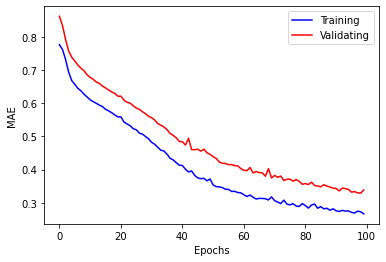

In [30]:
plt.plot(np.arange(0,len(history.history['mae'])), history.history['mae'], 'b', label='Training')
plt.plot(np.arange(0,len(history.history['mae'])), history.history['val_mae'], '-r', label='Validating')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show

In [33]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 888us/step - loss: 0.2670 - mae: 0.3449


In [34]:
test_mse_score

0.26702433824539185

In [35]:
test_mae_score

0.344901978969574

In [36]:
y_pred = model.predict(x_test)

In [37]:
y_pred = np.array(y_pred.reshape(y_pred.shape[0]))

In [ ]:
y_test = sorted(y_test.values)
y_pred = sorted(y_pred)

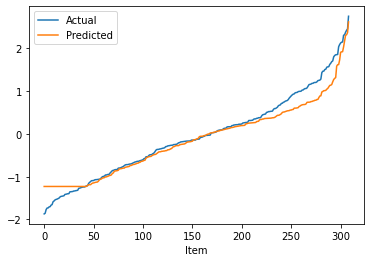

In [41]:
plt.plot(y_test,  label='Actual')
plt.plot(y_pred, label='Predicted')

   
plt.xlabel('Item')
plt.legend()
plt.show()